In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rujeenareang","key":"d4b82fd989fd63923995bcedb309b0a4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 97% 417M/429M [00:04<00:00, 85.1MB/s]
100% 429M/429M [00:05<00:00, 90.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ravdess-emotional-speech-audio.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set the path to the RAVDESS dataset
dataset_dir = '/content/audio_speech_actors_01-24'





In [ ]:

paths = []
labels = []

for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        paths.append(file_path)

        label = filename.split('-')[2]
        labels.append(label.lower())

print('Dataset is Loaded')


Dataset is Loaded


In [ ]:
paths

['/content/audio_speech_actors_01-24/Actor_13/03-01-06-02-01-01-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-08-02-02-01-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-05-02-01-02-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-05-02-02-02-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-02-02-01-02-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-01-01-01-01-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-08-02-01-02-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-02-01-01-01-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-04-02-01-01-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-01-01-01-02-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-07-01-02-01-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-06-01-01-02-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01-07-01-01-02-13.wav',
 '/content/audio_speech_actors_01-24/Actor_13/03-01

In [ ]:
labels

['06',
 '08',
 '05',
 '05',
 '02',
 '01',
 '08',
 '02',
 '04',
 '01',
 '07',
 '06',
 '07',
 '03',
 '07',
 '04',
 '05',
 '07',
 '02',
 '06',
 '07',
 '04',
 '04',
 '02',
 '08',
 '04',
 '06',
 '05',
 '07',
 '08',
 '03',
 '02',
 '08',
 '06',
 '08',
 '05',
 '07',
 '02',
 '04',
 '03',
 '01',
 '06',
 '03',
 '05',
 '01',
 '02',
 '06',
 '05',
 '08',
 '04',
 '07',
 '03',
 '06',
 '03',
 '02',
 '03',
 '04',
 '03',
 '05',
 '08',
 '04',
 '05',
 '07',
 '05',
 '07',
 '05',
 '05',
 '07',
 '08',
 '02',
 '01',
 '08',
 '02',
 '08',
 '04',
 '03',
 '05',
 '07',
 '03',
 '03',
 '06',
 '06',
 '06',
 '03',
 '06',
 '03',
 '07',
 '05',
 '08',
 '07',
 '06',
 '02',
 '04',
 '04',
 '06',
 '08',
 '01',
 '02',
 '06',
 '04',
 '06',
 '02',
 '05',
 '04',
 '02',
 '08',
 '03',
 '08',
 '02',
 '01',
 '03',
 '01',
 '03',
 '04',
 '07',
 '04',
 '07',
 '05',
 '08',
 '02',
 '08',
 '03',
 '03',
 '07',
 '05',
 '03',
 '05',
 '02',
 '07',
 '07',
 '04',
 '02',
 '08',
 '02',
 '04',
 '01',
 '03',
 '02',
 '05',
 '08',
 '02',
 '08',
 '03',

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/audio_speech_actors_01-24/Actor_13/03...,06
1,/content/audio_speech_actors_01-24/Actor_13/03...,08
2,/content/audio_speech_actors_01-24/Actor_13/03...,05
3,/content/audio_speech_actors_01-24/Actor_13/03...,05
4,/content/audio_speech_actors_01-24/Actor_13/03...,02


In [ ]:
df['label'].value_counts()

06    192
08    192
05    192
02    192
04    192
07    192
03    192
01     96
Name: label, dtype: int64

In [ ]:
import librosa
import matplotlib.pyplot as plt

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

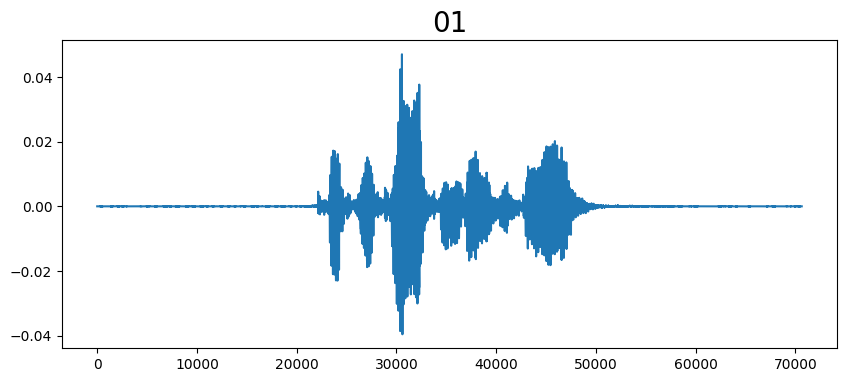

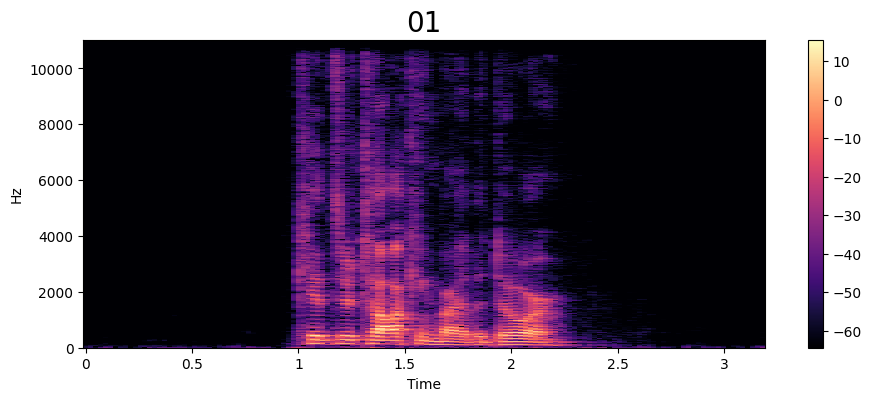

In [ ]:
emotion = '01'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-6.3768878e+02,  6.0222633e+01,  8.7999353e+00,  1.1295004e+01,
        5.3808093e+00,  1.6990430e+00, -5.4651427e+00, -9.3325663e-01,
       -4.1052375e+00, -1.2856634e+00,  9.1268378e-01, -5.1217914e+00,
        1.1226263e+00,  2.4318790e+00, -1.9126561e+00,  5.4123676e-01,
       -3.4312642e+00, -2.9008070e-01,  3.3466358e-02, -4.6825173e-01,
       -2.5219083e+00,  1.9969966e-01, -2.3486238e+00, -5.5253774e-01,
       -3.0944018e+00,  1.5353220e+00, -1.9855082e+00,  4.9865279e-01,
       -8.1234711e-01,  8.4832585e-01, -4.5837533e-01,  1.2223519e+00,
       -1.0279988e+00,  1.0826116e+00,  5.4713447e-02,  2.4920816e+00,
        7.3939115e-01,  1.3301837e+00,  1.5988592e+00,  4.0360665e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-637.6888, 60.222633, 8.799935, 11.295004, 5....
1       [-541.5465, 56.152172, 0.7268863, 3.773927, 2....
2       [-348.34103, 52.402016, -7.402245, 8.772961, -...
3       [-255.71239, 14.004756, -23.85436, -11.49508, ...
4       [-684.7981, 80.04422, -0.26781142, 8.305036, 1...
                              ...                        
1435    [-399.12405, 21.01254, -20.722279, -7.5734177,...
1436    [-478.96857, 35.31221, -13.229904, -8.166581, ...
1437    [-555.3167, 33.93499, -10.973731, 1.9217628, -...
1438    [-574.0184, 24.713806, -11.364527, -2.8384087,...
1439    [-526.80725, 32.989754, -13.119181, -0.2840371...
Name: speech, Length: 1440, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1440, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(1440, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(1440, 8)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(384, input_shape=(40,)),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='softmax')
])


model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 384)               15744     
                                                                 
 dense_1 (Dense)             (None, 256)               98560     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 148,232
Trainable params: 148,232
Non-trai

In [ ]:
history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=512, shuffle=True)


Epoch 1/100
3/3 [==============================] - 6s 129ms/step - loss: 59.6652 - accuracy: 0.1016 - val_loss: 26.2322 - val_accuracy: 0.1076
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 38.2451 - accuracy: 0.1319 - val_loss: 16.7289 - val_accuracy: 0.1354
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 27.3175 - accuracy: 0.1372 - val_loss: 9.2178 - val_accuracy: 0.1597
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 19.0973 - accuracy: 0.1441 - val_loss: 8.9330 - val_accuracy: 0.0903
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 13.2029 - accuracy: 0.1328 - val_loss: 5.4214 - val_accuracy: 0.1111
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 9.0737 - accuracy: 0.1450 - val_loss: 2.7541 - val_accuracy: 0.1493
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 6.4021 - accuracy: 0.1441 - val_loss: 2.2226 - val_accuracy: 0.1181
Epoch 8/100


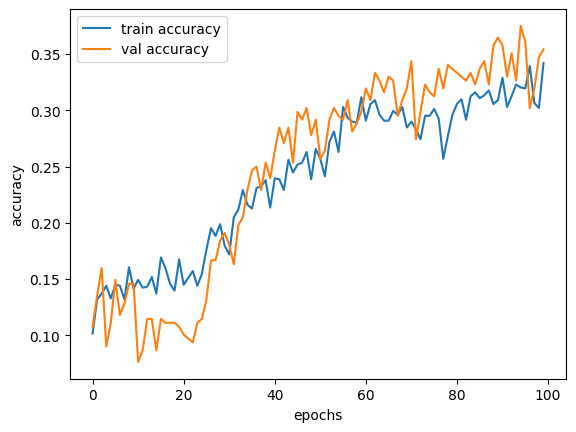

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
X_lstm = np.expand_dims(X, axis=2)
X_train_lstm, X_val_lstm, y_train, y_val = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.regularizers import l1_l2


In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(384, input_shape=(40, 1)))
model_lstm.add(Dense(256, activation='relu'))  # Dense layer added
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(128, activation='relu'))  # Dense layer added
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(8, activation='softmax'))

In [ ]:
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 384)               592896    
                                                                 
 dense_10 (Dense)            (None, 256)               98560     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 725,384
Trainable params: 725,384
Non-tr

In [ ]:
history_lstm = model_lstm.fit(X_train_lstm, y_train, validation_data=(X_val_lstm, y_val), epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
3/3 [==============================] - 4s 320ms/step - loss: 2.0808 - accuracy: 0.1241 - val_loss: 2.0467 - val_accuracy: 0.1493
Epoch 2/100
3/3 [==============================] - 0s 62ms/step - loss: 2.0373 - accuracy: 0.1910 - val_loss: 2.0164 - val_accuracy: 0.1701
Epoch 3/100
3/3 [==============================] - 0s 52ms/step - loss: 1.9990 - accuracy: 0.2170 - val_loss: 1.9632 - val_accuracy: 0.2049
Epoch 4/100
3/3 [==============================] - 0s 52ms/step - loss: 1.9471 - accuracy: 0.2448 - val_loss: 1.9467 - val_accuracy: 0.2639
Epoch 5/100
3/3 [==============================] - 0s 48ms/step - loss: 1.9164 - accuracy: 0.2587 - val_loss: 1.9099 - val_accuracy: 0.2743
Epoch 6/100
3/3 [==============================] - 0s 40ms/step - loss: 1.8694 - accuracy: 0.2943 - val_loss: 1.8860 - val_accuracy: 0.2569
Epoch 7/100
3/3 [==============================] - 0s 39ms/step - loss: 1.8721 - accuracy: 0.2830 - val_loss: 1.9128 - val_accuracy: 0.2431
Epoch 8/100
3/3 [==

In [ ]:
epochs = list(range(100))
acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']

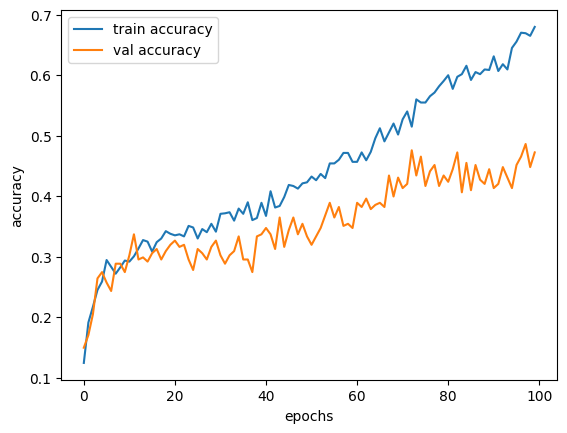

In [ ]:
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
X_svm = X.reshape(X.shape[0], -1)
y_svm = np.argmax(y, axis=1)
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


svm_model = SVC()
svm_model.fit(X_train_svm, y_train_svm)

SVC()

In [ ]:
y_val_pred_svm = svm_model.predict(X_val_svm)

In [ ]:
report_svm = classification_report(y_val_svm, y_val_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.26      0.83      0.39        30
           2       0.24      0.21      0.22        39
           3       0.00      0.00      0.00        41
           4       0.51      0.59      0.55        41
           5       0.17      0.17      0.17        30
           6       0.00      0.00      0.00        46
           7       0.23      0.45      0.30        40

    accuracy                           0.28       288
   macro avg       0.17      0.28      0.20       288
weighted avg       0.18      0.28      0.21       288



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
